In [1]:
%load_ext autoreload
%autoreload 2

## Calculate and save potential prognostic predictability

In [2]:
import xarray as xr
import numpy as np
import gfdl_utils as gu
import glob
from dask.diagnostics import ProgressBar
from information import *
from processing import *
from variance import *
import os

AttributeError: module 'climpred' has no attribute 'set_options'

In [ ]:
variable = 'siconc'
frequency = 'monthly'
verbose = True

In [ ]:
member = open_member(variable,frequency,startyear=123,startmonth=4,member=1,rechunk={'time':60})
member

In [ ]:
ensemble = open_ensemble(variable,
                         frequency,
                         startyear=123,
                         startmonth=1,
                         rechunk={'time':-1},
                         verbose=True)

In [ ]:
ensemble

In [56]:
control = open_control(variable,frequency,rechunk={'time':60})

In [57]:
control

<xarray.Dataset>
Dimensions:    (time: 300, yh: 576, xh: 720, nv: 2)
Coordinates:
  * xh         (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh         (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time       (time) object 0101-07-01 17:00:00 ... 0400-07-01 17:00:00
  * nv         (nv) float64 1.0 2.0
Data variables:
    intpp      (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>
Attributes:
    filename:          01010101.ocean_cobalt_omip_2d.nc
    title:             ESM4_piControl_D
    associated_files:  areacello: 01010101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           2022-03-14 16:55:28 -0400: PostProcessing::PPNetCDF::t...

In [108]:
evar = calc_evarmean(variable,frequency,startmonth=4,saveeach=False,save=False,rechunk={'time':-1},verbose=True)

Calculating mean ensemble variance.
Note : Ensure you are running with enough memory if trying to save.
Start year 123
Opening member 1
Opening member 2
Opening member 3
Opening member 4
Opening member 5
Opening member 6
Opening member 7
Opening member 8
Opening member 9
Adding control
Start year 161
Opening member 1
Opening member 2
Opening member 3
Opening member 4
Opening member 5
Opening member 6
Opening member 7
Opening member 8
Opening member 9
Adding control
Start year 185
Opening member 1
Opening member 2
Opening member 3
Opening member 4
Opening member 5
Opening member 6
Opening member 7
Opening member 8
Opening member 9
Adding control
Start year 208
Opening member 1
Opening member 2
Opening member 3
Opening member 4
Opening member 5
Opening member 6
Opening member 7
Opening member 8
Opening member 9
Adding control
Start year 230
Opening member 1
Opening member 2
Opening member 3
Opening member 4
Opening member 5
Opening member 6
Opening member 7
Opening member 8
Opening membe

In [109]:
evar

<xarray.Dataset>
Dimensions:  (xh: 720, yh: 576, time: 6, nv: 2)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) int64 0 1 2 3 4 5
  * nv       (nv) float64 1.0 2.0
Data variables:
    intpp    (time, yh, xh) float32 dask.array<chunksize=(2, 576, 720), meta=np.ndarray>

In [61]:
ppp = calc_ppp(variable,
               frequency,
               startmonth=1,
               verbose=True,
               saveeachensemble=False,
               saveensemblemean=False,
               savecontrol=False,
               save=True)

/work/gam/projects/esm4_ppe/data/processed/ppp/ocean_cobalt_omip_2d_annual.01.zarr/intpp already saved.


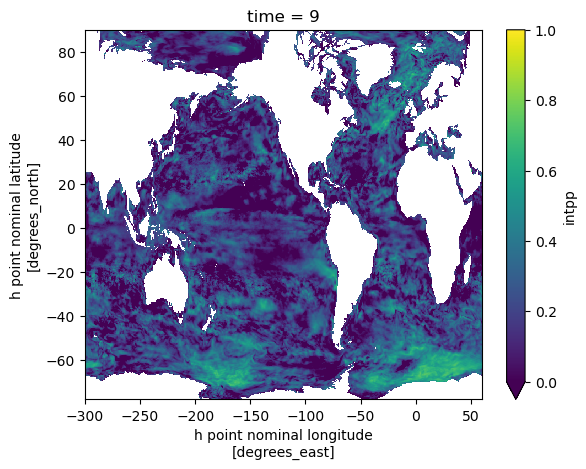

In [70]:
ppp['intpp'].isel(time=9).plot(vmin=0,vmax=1)